實際pH值結果：
[5.22 5.07 4.73 5.14 4.06 5.02 4.53 5.03 4.44 4.16 4.7  5.3  5.02 5.19
 5.6  4.61 4.96 4.75 4.6  4.5  4.95 5.13 5.39 4.82 4.7  5.45 6.59 6.14
 6.01 6.02 5.55 5.85]
預測pH值結果
[5.11368168 5.12124044 5.1226067  5.11269438 5.08694465 5.0909471
 5.12917689 5.11194028 4.93102301 4.99568946 5.00206701 5.13605759
 5.14097256 5.14670374 5.14971507 5.13409186 5.13823372 5.08948198
 5.14033506 5.13700941 5.13217429 5.09221196 5.13638965 5.12416433
 5.13915638 5.15503308 5.12562057 5.15456034 5.13951506 5.1558835
 5.13958983 5.12827324]


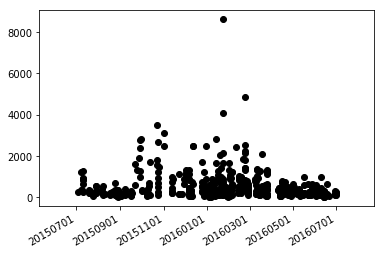

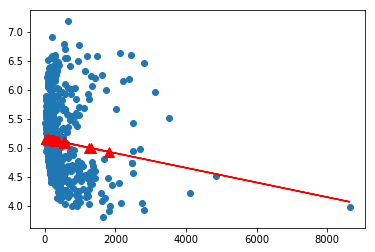

In [10]:
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
rain=pd.read_csv("rain.csv",encoding="big5")
xs = [datetime.strptime(d, '%Y%m%d').date() for d in (rain.date).astype(str)]
ys = rain.Sum
#Y座標
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))


plt.scatter(xs, ys,color='black')
plt.gcf().autofmt_xdate()  

x=np.array(rain.Sum)#rain.Sum空氣中懸浮微粒的加總
y=np.array(rain.pH)#rain.pH檢測出酸雨中的pH值

#初始化建立線性回歸模型
model = LinearRegression()
model.fit(x[:, np.newaxis], y)

# 匯入rain_test.csv空氣品質資料
# 新的PM2.5預測酸雨的PH值
rain_test=pd.read_csv('rain_test.csv',encoding='big5')
rain_testX=np.array(rain_test.pH)
rain_testY=np.array(rain_test.Sum)
to_be_predicted = rain_testY
predicted_ph = model.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

#圖形化呈現
yfit = model.predict(x[:, np.newaxis])
plt.figure(figsize=(6,4))
plt.scatter(x, y)
#將預測的資料繪製圖中
plt.plot(x, yfit,color='red')
plt.plot(to_be_predicted,predicted_ph , color = 'red', marker = '^', markersize = 10)

#顯示預測的結果
print("實際pH值結果：")
print(rain_testX)
print("預測pH值結果")
print(predicted_ph)